<h2>Task 1 – Bike journey exploratory data analysis</h2>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

Module Code:

o Assignment report Title: Individual

o Student Number: 26006220

o Date (when the work completed): 06/12/20

o Actual hrs spent for the assignment: 6

<h3>Load the metro.csv file into a Pandas data frame.</h3>

<h3>Find a sensible way to remove the missing values from the data frame and
explain why you have chosen this method.</h3>

In [2]:
metro = pd.read_csv('./Datasets/metro.csv').dropna(axis='columns')

In [3]:
metro

,trip_id,duration,start_time,end_time,start_station,end_station,bike_id,plan_duration,trip_route_category,passholder_type,bike_type
0,124657107,5,7/1/2019 0:04,7/1/2019 0:09,4312,4410,6168,30,One Way,Monthly Pass,standard
1,124657587,9,7/1/2019 0:07,7/1/2019 0:16,3066,3066,17584,30,Round Trip,Monthly Pass,electric
2,124658068,5,7/1/2019 0:20,7/1/2019 0:25,4410,4312,18920,30,One Way,Monthly Pass,electric
3,124659747,20,7/1/2019 0:44,7/1/2019 1:04,3045,4275,6016,1,One Way,Walk-up,standard
4,124660227,27,7/1/2019 0:44,7/1/2019 1:11,3035,3049,5867,30,One Way,Monthly Pass,standard
...,...,...,...,...,...,...,...,...,...,...,...
92119,130053092,8,9/30/2019 23:32,9/30/2019 23:40,3038,3078,19655,1,One Way,Walk-up,electric
92120,130053090,15,9/30/2019 23:38,9/30/2019 23:53,4401,4401,18984,30,Round Trip,Monthly Pass,electric
92121,130053089,1,9/30/2019 23:40,9/30/2019 23:41,3038,3067,12361,365,One Way,Annual Pass,standard
92122,130053088,22,9/30/2019 23:41,10/1/2019 0:03,3067,3049,16580,365,One Way,Annual Pass,electric


<h3>Explore the distribution of the duration variable. You should produce a plot
visualising the distribution and calculate and briefly discuss statistics of the
variable</h3>

In [4]:
metro.duration.value_counts().describe()

count     857.000000
mean      107.495916
std       548.707688
min         1.000000
25%         1.000000
50%         2.000000
75%         6.000000
max      5592.000000
Name: duration, dtype: float64

here you can see the mean duration is 109 minutes but the standard deviation is high

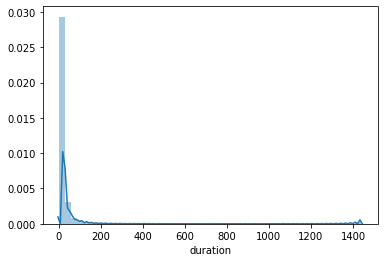

In [5]:
sns.distplot(metro['duration'])

from here you can see the standard deviation of the distribution is very high since most rides have a low duration

<h3>Produce a plot showing how the distribution of duration relates to
passholder_type.</h3>

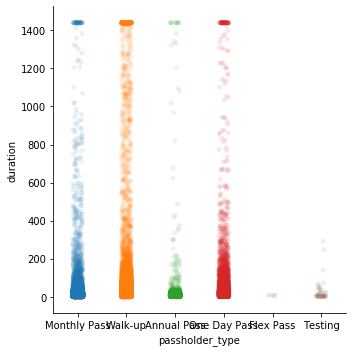

In [6]:
sns.catplot(x = 'passholder_type', y = 'duration',  data = metro, alpha=0.1)

<h3>Convert the start_time and end_time columns to date objects if they are not
already.</h3>

In [10]:
metro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92124 entries, 0 to 92123
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   trip_id              92124 non-null  int64 
 1   duration             92124 non-null  int64 
 2   start_time           92124 non-null  object
 3   end_time             92124 non-null  object
 4   start_station        92124 non-null  int64 
 5   end_station          92124 non-null  int64 
 6   bike_id              92124 non-null  object
 7   plan_duration        92124 non-null  int64 
 8   trip_route_category  92124 non-null  object
 9   passholder_type      92124 non-null  object
 10  bike_type            92124 non-null  object
dtypes: int64(5), object(6)
memory usage: 7.7+ MB


In [11]:
metro[["start_time", "end_time"]] = metro[["start_time", "end_time"]].apply(pd.to_datetime)

In [12]:
metro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92124 entries, 0 to 92123
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   trip_id              92124 non-null  int64         
 1   duration             92124 non-null  int64         
 2   start_time           92124 non-null  datetime64[ns]
 3   end_time             92124 non-null  datetime64[ns]
 4   start_station        92124 non-null  int64         
 5   end_station          92124 non-null  int64         
 6   bike_id              92124 non-null  object        
 7   plan_duration        92124 non-null  int64         
 8   trip_route_category  92124 non-null  object        
 9   passholder_type      92124 non-null  object        
 10  bike_type            92124 non-null  object        
dtypes: datetime64[ns](2), int64(5), object(4)
memory usage: 7.7+ MB


 you can see that start and end date are now datetime64

<h3>Create a new column in the data frame that gives the hour of the day that
each journey started on.</h3>

In [13]:
metro['start_hour'] = metro['start_time'].dt.hour

metro['start_hour'].unique()

array([ 0,  1,  2,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23,  3], dtype=int64)

looks like its working

<h3>Explore how the duration variable varies between each journey starting hour
of the day, creating a plot to visualise this.</h3>

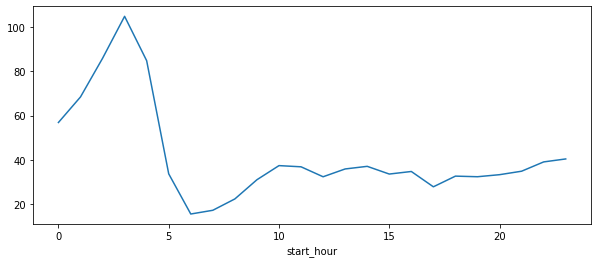

In [14]:
metro.duration.groupby(metro.start_hour).mean().plot(figsize=(10,4))

from this figure you see high duration journey's start early in the day. which makes sense

<h3>Explore the distribution of the bike type. What kind of bike is more popular?</h3>

In [15]:
metro.bike_type.value_counts()

electric    46446
standard    29477
smart       16201
Name: bike_type, dtype: int64

electric is most popular

<h3>Explore how the distribution of the duration variable varies between each
day of the week and by bike type, creating plots to visualise this. Discuss the
results.</h3>

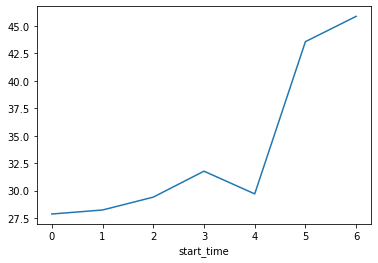

In [16]:
metro.duration.groupby([metro.start_time.dt.dayofweek]).mean().plot()

the average duration is longer towards the end of the week

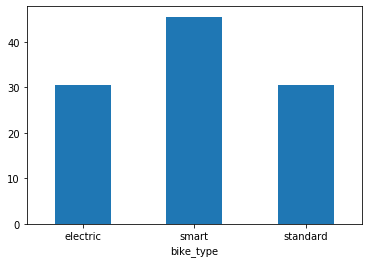

In [17]:
metro.duration.groupby([metro.bike_type]).mean().plot.bar(rot=0)

the smart bike type has the longest average duration

<h3>Calculate the total numbers of passholders of each type travelling on each
weekday. Discuss the results.</h3>

In [18]:
metro[metro.start_time.dt.dayofweek == 2].passholder_type.value_counts()

Monthly Pass    9099
Walk-up         2846
Annual Pass     1082
One Day Pass     579
Testing            6
Name: passholder_type, dtype: int64

you can see that the majority of passholders are on Monthly pass

## Task 2 – Data Clustering - Seed shape data

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

<h3>Load the seeds.csv file into a Pandas data frame. </h3>

In [21]:
seeds = pd.read_csv('./Datasets/seeds.csv')

<h3>Explore the data, and find a way to cluster the seeds implementing one of the
algorithms provided in the lectures. Visualise the results and explain why you</h3>

In [22]:
seeds.head()

,area,perimeter,compactness,length,width,asymmetry,groove length
0,15.26,14.84,0.871,5.763,3.312,2.221,5.220
1,14.88,14.57,0.881,5.554,3.333,1.018,4.956
2,14.29,14.09,0.905,5.291,3.337,2.699,4.825
3,13.84,13.94,0.895,5.324,3.379,2.259,4.805
4,16.14,14.99,0.903,5.658,3.562,1.355,5.175


I am going to use the KMeans algorithm to sample the data into a set of clusters. I am gonig to use the elbow method to define the cluster size


In [23]:
distance = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(seeds)
    distance.append(km.inertia_)

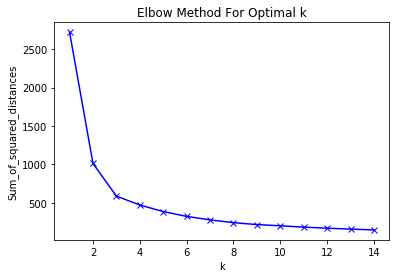

In [24]:
plt.plot(K, distance, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

from this reasult I can see the optimal number of clusters is 3

In [25]:
kmeans = KMeans(n_clusters=3).fit(seeds)

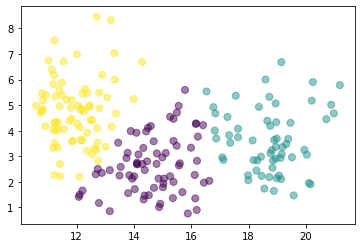

In [26]:
plt.scatter(seeds['area'], seeds['asymmetry'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.show()

from this graph you can clearly see 3 distinct groups 

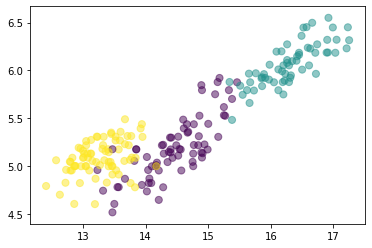

In [27]:
plt.scatter(seeds['perimeter'], seeds['groove length'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.show()

The same when comparing perimeter with groove length, you can see 3 nearly distinct groups

<h1>Task 3 – Social network analysis </h1>

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
%matplotlib inline

<h1>Using the library Networkx, load the social network data from the socialnetwork.csv file</h1>

In [8]:
sn = pd.read_csv('./Datasets/social-network.csv')

<h1>Produce a visualisation of the network topology and discuss the output.</h1>

In [9]:
sn.head()

,1,2
0,1,3
1,1,4
2,1,5
3,1,6
4,1,7


In [10]:
g = nx.from_pandas_edgelist(sn, source='1', target='2') 

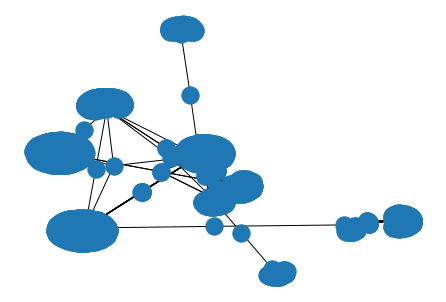

In [11]:
nx.draw(g)

<h1>Calculate statistics of the network, plot them where relevant, and discuss the
results, explaining the meaning of any statistics you have calculated</h1>

In [12]:
nx.info(g)

'Name: \nType: Graph\nNumber of nodes: 2887\nNumber of edges: 2980\nAverage degree:   2.0644'

here we can see the network has more edges than nodes

I am going to check the number of connections each node has

In [13]:
nx.degree(g)

DegreeView({1: 286, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1, 13: 1, 14: 1, 15: 1, 16: 1, 17: 1, 18: 1, 19: 1, 20: 1, 21: 1, 22: 1, 23: 1, 24: 1, 25: 1, 26: 1, 27: 1, 28: 1, 29: 1, 30: 1, 31: 1, 32: 1, 33: 1, 34: 1, 35: 2, 36: 1, 37: 1, 38: 1, 39: 1, 40: 1, 41: 1, 42: 1, 43: 1, 44: 1, 45: 1, 46: 1, 47: 1, 48: 1, 49: 1, 50: 1, 51: 1, 52: 1, 53: 1, 54: 1, 55: 1, 56: 1, 57: 1, 58: 1, 59: 1, 60: 1, 61: 1, 62: 1, 63: 1, 64: 1, 65: 1, 66: 1, 67: 1, 68: 1, 69: 2, 70: 1, 71: 3, 72: 1, 73: 1, 74: 1, 75: 1, 76: 1, 77: 1, 78: 1, 79: 1, 80: 1, 81: 1, 82: 1, 83: 1, 84: 1, 85: 1, 86: 1, 87: 1, 88: 1, 89: 1, 90: 2, 91: 1, 92: 1, 93: 1, 94: 1, 95: 1, 96: 1, 97: 1, 98: 1, 99: 1, 100: 1, 101: 1, 102: 1, 103: 1, 104: 1, 105: 1, 106: 1, 107: 1, 108: 1, 109: 1, 110: 1, 111: 1, 112: 1, 113: 1, 114: 1, 115: 1, 116: 1, 117: 1, 118: 1, 119: 1, 120: 1, 121: 1, 122: 1, 123: 1, 124: 1, 125: 1, 126: 1, 127: 1, 128: 1, 129: 1, 130: 1, 131: 1, 132: 1, 133: 1, 134: 1, 135: 1, 136: 1, 137: 1, 138:

node 1 has the most connections

I will use degree_centrality to find the most influential node, which should be node 1

In [14]:
nx.degree_centrality(g)

{1: 0.0990990990990991,
 3: 0.0003465003465003465,
 4: 0.0003465003465003465,
 5: 0.0003465003465003465,
 6: 0.0003465003465003465,
 7: 0.0003465003465003465,
 8: 0.0003465003465003465,
 9: 0.0003465003465003465,
 10: 0.0003465003465003465,
 11: 0.0003465003465003465,
 12: 0.0003465003465003465,
 13: 0.0003465003465003465,
 14: 0.0003465003465003465,
 15: 0.0003465003465003465,
 16: 0.0003465003465003465,
 17: 0.0003465003465003465,
 18: 0.0003465003465003465,
 19: 0.0003465003465003465,
 20: 0.0003465003465003465,
 21: 0.0003465003465003465,
 22: 0.0003465003465003465,
 23: 0.0003465003465003465,
 24: 0.0003465003465003465,
 25: 0.0003465003465003465,
 26: 0.0003465003465003465,
 27: 0.0003465003465003465,
 28: 0.0003465003465003465,
 29: 0.0003465003465003465,
 30: 0.0003465003465003465,
 31: 0.0003465003465003465,
 32: 0.0003465003465003465,
 33: 0.0003465003465003465,
 34: 0.0003465003465003465,
 35: 0.000693000693000693,
 36: 0.0003465003465003465,
 37: 0.0003465003465003465,
 38:

Degree Distributions

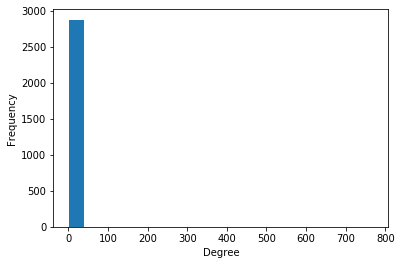

In [15]:
degrees = [g.degree(n) for n in g.nodes()]
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.hist(degrees, bins=20)
plt.show()

this shows the degree distribution is low

Cluster coefficient

Text(0.5, 0, 'Clustering coeff.')

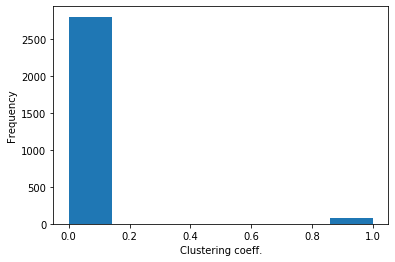

In [16]:
cc = nx.clustering(g)
plt.hist(list(cc.values()),bins=7)
plt.ylabel("Frequency")
plt.xlabel("Clustering coeff.")

this grpah shows the Cluster coefficient is low

force directed layout

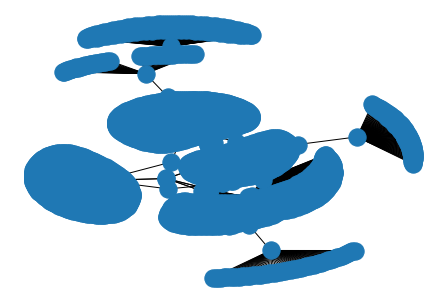

In [17]:
nx.draw_kamada_kawai(g)

Compute degree assortativity of graph

In [18]:
r = nx.degree_assortativity_coefficient(g)
print(f"{r:3.1f}")

-0.7


a value of -0.7 is low, meaning nodes in the network dont interact often with eachother

In [20]:
bc = nx.betweenness_centrality(g)

In [26]:
bc

{1: 0.18553227937977304,
 3: 0.0,
 4: 0.0,
 5: 0.0,
 6: 0.0,
 7: 0.0,
 8: 0.0,
 9: 0.0,
 10: 0.0,
 11: 0.0,
 12: 0.0,
 13: 0.0,
 14: 0.0,
 15: 0.0,
 16: 0.0,
 17: 0.0,
 18: 0.0,
 19: 0.0,
 20: 0.0,
 21: 0.0,
 22: 0.0,
 23: 0.0,
 24: 0.0,
 25: 0.0,
 26: 0.0,
 27: 0.0,
 28: 0.0,
 29: 0.0,
 30: 0.0,
 31: 0.0,
 32: 0.0,
 33: 0.0,
 34: 0.0,
 35: 0.02394563607735185,
 36: 0.0,
 37: 0.0,
 38: 0.0,
 39: 0.0,
 40: 0.0,
 41: 0.0,
 42: 0.0,
 43: 0.0,
 44: 0.0,
 45: 0.0,
 46: 0.0,
 47: 0.0,
 48: 0.0,
 49: 0.0,
 50: 0.0,
 51: 0.0,
 52: 0.0,
 53: 0.0,
 54: 0.0,
 55: 0.0,
 56: 0.0,
 57: 0.0,
 58: 0.0,
 59: 0.0,
 60: 0.0,
 61: 0.0,
 62: 0.0,
 63: 0.0,
 64: 0.0,
 65: 0.0,
 66: 0.0,
 67: 0.0,
 68: 0.0,
 69: 0.021741725727860768,
 70: 0.0,
 71: 0.00885680107517199,
 72: 0.0,
 73: 0.0,
 74: 0.0,
 75: 0.0,
 76: 0.0,
 77: 0.0,
 78: 0.0,
 79: 0.0,
 80: 0.0,
 81: 0.0,
 82: 0.0,
 83: 0.0,
 84: 0.0,
 85: 0.0,
 86: 0.0,
 87: 0.0,
 88: 0.0,
 89: 0.0,
 90: 0.0033071126052061587,
 91: 0.0,
 92: 0.0,
 93: 0.0,
 94: 

each node with a high value is important to the network, meaning it connects alot of other nodes togeather